# Feature Scaling

In this notebook, we will use the [Pima Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) from the UCI Machine Learning Database to learn how to scale feature data. Scaling means to change the range of values for the data so that features (columns) that have vastly different numerical ranges can be more easily compared. We will look at 2 types of scaling - z-score standardization and Min-max scaling.

In [ ]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [ ]:
filepath = "diabetes.csv"

pima_df = pd.read_csv(filepath)
pima_df.head()

In [ ]:
#check if any missing values in the data
pima_df.count()

In [ ]:
#descriptive statistics
pima_df.describe()

In [ ]:
#plot the frequency count for each column
pima_df.hist(figsize=(10,10))

We can see from the descriptive statistics and the frequency distribution plots that each feature (column) has varying ranges. Features such as Insulin have a high maximum value but other features like DiabetesPedigreeFunction have low maximum values.

In [ ]:
#plot frequency count data but using the same scale (minimum and maximum value out of all columns)
pima_df.hist(figsize=(10,10), sharex=True)

**Scaling will help to find any drastic effects that occur in the data when comparing multiple features. If we try to see any effects when putting the features on the same scale in the default data, as in the above charts, smaller values cannot be seen.**

### Z-score Standardization

Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.
### \begin{align}  z = \frac{(value - mean)}{std dev} \end{align}

In [ ]:
#first 5 rows of the 'Glucose' column
pima_df['Glucose'].head()

In [ ]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = pima_df['Glucose'].mean()

#standard deviation of the column
std = pima_df['Glucose'].std()

#each value in column minus the mean and then divide by the standard deviation
glucose_z_manual = (pima_df['Glucose'] - mean)/std

In [ ]:
#values for mean and standard deviation of 'Glucose column'
mean, std

In [ ]:
glucose_z_manual.mean(), glucose_z_manual.std()

In [ ]:
#first 5 rows of z-score standardized 'Glucose' column
glucose_z_manual.head()

In [16]:
pima_df[['Glucose']].head()

,Glucose
0,148
1,85
2,183
3,89
4,137


In [17]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
glucose_zscore = scaler.fit_transform(pima_df[['Glucose']])

In [18]:
#mean and standard deviation of z-score standardized 'Glucose' column
glucose_zscore.mean(), glucose_zscore.std()

(-9.25185853854297e-18, 1.0)

In [19]:
glucose_zscore[:5]

array([[ 0.84832379],
       [-1.12339636],
       [ 1.94372388],
       [-0.99820778],
       [ 0.5040552 ]])

In [20]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
glu_z_col = pd.Series(glucose_zscore.reshape(-1))

In [21]:
#first 5 rows of z-score standardized glucose column
glu_z_col.head()

0    0.848324
1   -1.123396
2    1.943724
3   -0.998208
4    0.504055
dtype: float64

In [ ]:
pima_df[z_glucose]=

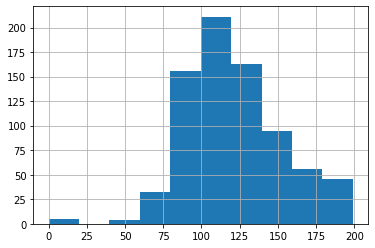

In [22]:
#BEFORE: frequency count plot of 'Glucose' column
pima_df['Glucose'].hist()

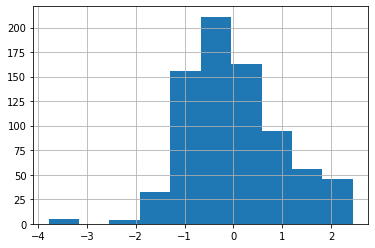

In [23]:
#AFTER: frequency count plot of 'Glucose' column (z-score standardization)
#range is much smaller
glu_z_col.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029362756288>,
      dtype=object)

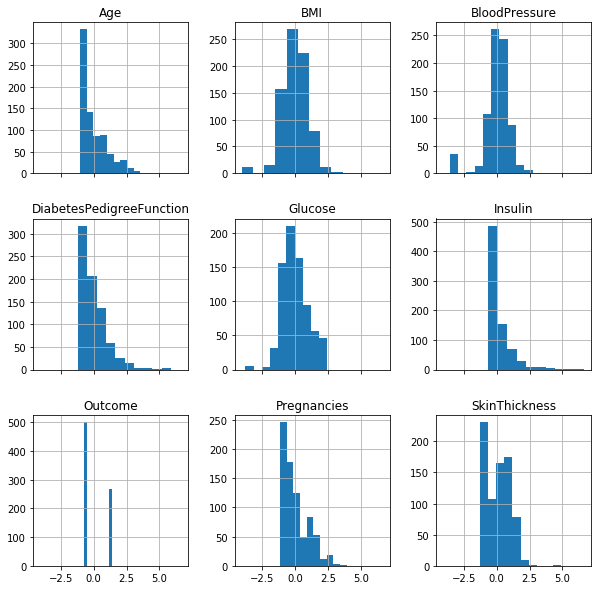

In [24]:
#show z-score standardization for all columns

#list to hold column names
colnames = list(pima_df.columns)

#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(pima_df), columns = colnames)

#plot frequency distribution with same scale range
zscore_df.hist(figsize=(10,10), sharex=True)

### Min-max Scaling
Max-min scaling transforms the data into a range from 0 to 1. The new minimum value of the column will always be 0 and the new maximum value of the column will always be 1. The values in between are calculated by using the original value and subtracting the column's minimum value, then dividing by the maximum value of the column minus the minimum value.

### \begin{align}  m = \frac{(value - min)}{max - min} \end{align}

In [25]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [26]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
glucose_minmax = minmax_sc.fit_transform(pima_df[['Glucose']])

In [27]:
#mean and standard deviation of Min-Max 'Glucose' column
glucose_minmax.mean(), glucose_minmax.std()

(0.6075102072864321, 0.16056178848343078)

In [28]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
glu_mm_col = pd.Series(glucose_minmax.reshape(-1))
glu_mm_col.head()

0    0.743719
1    0.427136
2    0.919598
3    0.447236
4    0.688442
dtype: float64

In [29]:
#verify the range is between 0 and 1
glu_mm_col.min(), glu_mm_col.max()

(0.0, 1.0)

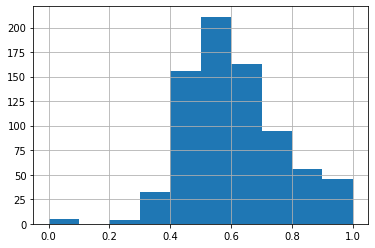

In [30]:
glu_mm_col.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029362D904C8>,
      dtype=object)

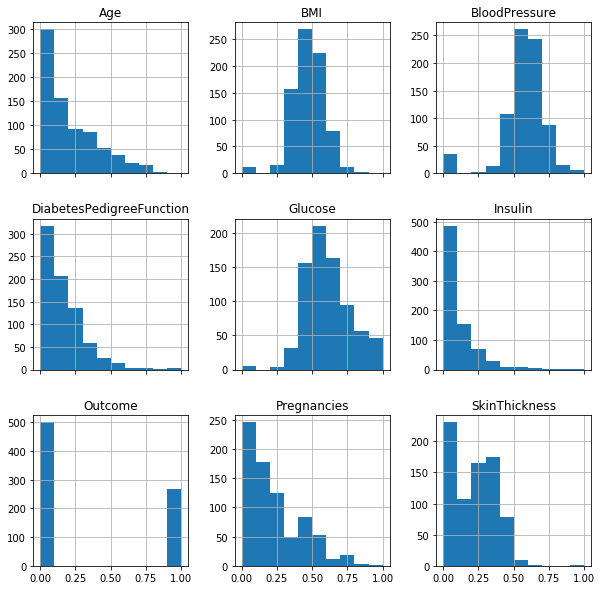

In [31]:
#show min-max scaling for all columns

#calculate z-scores
minmax_df = pd.DataFrame(minmax_sc.fit_transform(pima_df), columns = colnames)

#plot frequency distribution with same scale range
minmax_df.hist(figsize=(10,10), sharex=True)

### Tips for Predictive Models

- Z-score standardization is most useful for regression models, such as linear regression and logistic regression
- Min-Max scaling is more relevant for algorithms that calculate distances between data points, such as K-Nearest Neighbors and K-Means Clustering